<a href="https://colab.research.google.com/github/fsaudm/Chroma-Haven/blob/main/Neural_Network_in_NP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Neural Network using NumPy for MNIST

**Note**

For 2-D arrays, np.dot performs matrix multiplication. To be more readable and explicit:
- **np.matmul()** is used for matrix multiplication
- "*" is used for element-wise multiplication

In [1]:
# Importing mighty NumPy!
import numpy as np

In [2]:
# To load the dataset from Colab
import pandas as pd

# Mnist

train = pd.read_csv("/content/sample_data/mnist_train_small.csv", header=None)
train = train.values  # Convert to a NumPy array
X_train = train[:, 1:]/255.0  # Normalize the data
y_train = train[:, 0].reshape(-1, 1)


test = pd.read_csv("/content/sample_data/mnist_test.csv", header=None)
test = test.values
X_test = test[:, 1:]/255.0  # Normalize the data
y_test = test[:, 0].reshape(-1, 1)


# Shape
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (20000, 784)
y_train shape: (20000, 1)
X_test shape: (10000, 784)
y_test shape: (10000, 1)


In [3]:
# # Load the MNIST dataset
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1)
# X, y = mnist.data, mnist.target

# # Transform to arrays
# X = X.to_numpy()
# y = y.to_numpy().astype(int).reshape(-1,1)

# # Normalize X
# X = X / 255.0  # Normalize the data

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
print(f"Label distribution in y_train: \n {np.unique(y_train, return_counts=True)} \n")
print(f"Label distribution in y_test: \n {np.unique(y_test, return_counts=True)}")

Label distribution in y_train: 
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1962, 2243, 1989, 2021, 1924, 1761, 2039, 2126, 1912, 2023])) 

Label distribution in y_test: 
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))


## Neural Network definition & Functions

In [5]:
# @title ReLu
def relu(array):
    return np.maximum(0, array)  # Vectorized ReLU

In [6]:
# @title Softmax
def softmax(array):
    # Clip values to prevent overflow
    array = np.clip(array, -500, 500)
    exps = np.exp(array - np.max(array, axis=1, keepdims=True)) # Substract the max, broadcast
    return exps / np.sum(exps, axis=1, keepdims=True)  # Divide by sum, broadcast

In [7]:
# @title Predict Y
def predict_y(array):
    return np.argmax(array, axis=1)  # Divide by sum, broadcast

In [8]:
# @title One-hot encoding for Labels
def one_hot_encode(y, n_classes = 10):
    return np.eye(n_classes)[y].reshape(-1, n_classes)

In [9]:
# @title Cross-entropy
def cross_entropy_loss(y_true, y_pred):
    loss = -np.mean(y_true * np.log(y_pred + 1e-9)) # Average loss over the batch
    return loss

### Network Architecture & Params

In [10]:
# @title Parameters
def initialize_parameters(input_dim, hidden1_dim, hidden2_dim, output_dim):
    W1 = np.random.randn(input_dim, hidden1_dim) * np.sqrt(2. / input_dim)
    b1 = np.zeros((1, hidden1_dim))
    W2 = np.random.randn(hidden1_dim, hidden2_dim) * np.sqrt(2. / hidden1_dim)
    b2 = np.zeros((1, hidden2_dim))
    W3 = np.random.randn(hidden2_dim, output_dim) * np.sqrt(2. / hidden2_dim)
    b3 = np.zeros((1, output_dim))
    return W1, W2, W3, b1, b2, b3

In [11]:
# @title Forward pass, Vetorized!
np.random.seed(77)

i=10
x = X_train[:i]
y = y_train[:i]
num_classes = 10

# Initialize parameters
input_dim = 784
hidden1_dim = 128
hidden2_dim = 64
output_dim = 10

W1, W2, W3, b1, b2, b3 = initialize_parameters(input_dim, hidden1_dim, hidden2_dim, output_dim)

### Network Example
### 1 forward pass
# From input to hidden 1
z1 = np.matmul(x,W1) + b1
a1 = relu(z1)

# From hidden 1 to hidden 2
z2 = np.matmul(a1,W2) + b2
a2 = relu(z2)

# From hidden 2 to output
z3 = np.matmul(a2,W3) + b3
a3 = softmax(z3)

# From output to prediction
y_hat = predict_y(a3).reshape(-1,1)

# Calculate loss
loss = cross_entropy_loss(one_hot_encode(y, num_classes), a3)



# Results:
print(f"Probabilies:\n {a3}, shape: {a3.shape}\n")
print(f"Predicted Y:\n {y_hat}, shape: {y_hat.shape}\n")
print(f"Actual Y:\n {y_train[:i]}, shape: {y_train[:i].shape}\n")
print(f"Loss:\n {loss}\n")


# Shapes:
print(f"Input shape: {x.shape}")
print(f"Predicted Y shape: {y_hat.shape}")

print(f"Parameters W1 shape: {W1.shape}")
print(f"Parameters b1 shape: {b1.shape}")
print(f"Parameters W2 shape: {W2.shape}")
print(f"Parameters b2 shape: {b2.shape}")
print(f"Parameters W3 shape: {W3.shape}")
print(f"Parameters b3 shape: {b3.shape}")

Probabilies:
 [[0.11733263 0.06609539 0.08865623 0.08824106 0.10087229 0.08878498
  0.13841442 0.04649303 0.12330861 0.14180136]
 [0.08137528 0.03863917 0.09789757 0.09745332 0.10597802 0.08851069
  0.14254998 0.05846954 0.10516031 0.18396613]
 [0.04992956 0.06360686 0.07616773 0.07650776 0.1227953  0.05010015
  0.13024905 0.09755361 0.17580309 0.15728688]
 [0.10503193 0.07760418 0.10106412 0.06629002 0.08223915 0.08457014
  0.14472563 0.08227575 0.11070808 0.14549101]
 [0.07489542 0.0300609  0.08480222 0.06860499 0.09137231 0.06776257
  0.17307812 0.05814437 0.16373525 0.18754385]
 [0.08809946 0.03252733 0.06278415 0.09410448 0.09235638 0.07612928
  0.16511115 0.03761974 0.19044173 0.16082632]
 [0.06871737 0.02832598 0.11960507 0.0437029  0.07847501 0.02069992
  0.11135655 0.04534697 0.26605171 0.21771852]
 [0.07360012 0.05340208 0.14168721 0.04405848 0.13227811 0.03669042
  0.08118515 0.08908264 0.17040988 0.17760589]
 [0.05974169 0.03258083 0.05514698 0.06898314 0.07015171 0.0893618

### Back Propagation

In [12]:
# @title ReLu 'prime'
def relu_prime(array):
    return np.where(array > 0, 1, 0) ## Boolean for z>0, 1, 0

No need for "Softmax prime". A softmax function followed by a cross-entropy function is a combination that works very well, and the derivative is quite simple.

In [19]:
# @title Backwards pass, updating parameters

### Network Example
### backwards pass
### Division by m is to average the gradients over all observations in the batch.

m = y.shape[0]  # Number of examples

# Step 1: Calculate error at the output layer
delta3 = a3 - one_hot_encode(y, num_classes) # daL/dzL * dC/daL

# Step 2: Calculate gradients for W3 and b3
dW3 = np.matmul(a2.T, delta3) / m  # dzL/dWL
db3 = np.sum(delta3, axis=0, keepdims=True) / m  # dzL/dbL

# Step 3: Propagate the error to hidden layer 2
delta2 = np.matmul(delta3, W3.T) * relu_prime(z2)  #  da(L-1)/dz(L-1) * dzL/da(L-1)

# Step 4: Calculate gradients for W2 and b2
dW2 = np.matmul(a1.T, delta2) / m  # dz(L-1)/dW(L-1)
db2 = np.sum(delta2, axis=0, keepdims=True) / m  # dz(L-1)/db(L-1)

# Step 5: Propagate the error to hidden layer 1
delta1 = np.matmul(delta2, W2.T) * relu_prime(z1)  # da(L-2)/dz(L-2) * dz(L-1)/da(L-2)

# Step 6: Calculate gradients for W1 and b1
dW1 = np.matmul(x.T, delta1) / m  # dz(L-2)/dW(L-2)
db1 = np.sum(delta1, axis=0, keepdims=True) / m  # dz(L-2)/db(L-2)


### Parameters update
lr = 3e-2

# Update weights and biases
W1 -= lr * dW1
b1 -= lr * db1
W2 -= lr * dW2
b2 -= lr * db2
W3 -= lr * dW3
b3 -= lr * db3

## Training

In [14]:
def forward_pass(x, y, num_classes, W1, W2, W3, b1, b2, b3):

  # From input to hidden 1
  z1 = np.matmul(x,W1) + b1
  a1 = relu(z1)

  # From hidden 1 to hidden 2
  z2 = np.matmul(a1,W2) + b2
  a2 = relu(z2)

  # From hidden 2 to output
  z3 = np.matmul(a2,W3) + b3
  a3 = softmax(z3)

  # From output to prediction
  y_hat = predict_y(a3).reshape(-1,1)

  # Calculate loss
  loss = cross_entropy_loss(one_hot_encode(y, num_classes), a3)

  return loss, y_hat, a3, a2, a1, z3, z2, z1


def backwards_pass(x, y, num_classes, lr, a3, a2, a1, W1, W2, W3, b1, b2, b3, z1, z2, z3):
  ### Error propagation
  m = y.shape[0]  # Number of examples

  delta3 = a3 - one_hot_encode(y, num_classes)
  dW3 = np.matmul(a2.T, delta3) / m
  db3 = np.sum(delta3, axis=0, keepdims=True) / m

  delta2 = np.matmul(delta3, W3.T) * relu_prime(z2)
  dW2 = np.matmul(a1.T, delta2) / m
  db2 = np.sum(delta2, axis=0, keepdims=True) / m

  delta1 = np.matmul(delta2, W2.T) * relu_prime(z1)
  dW1 = np.matmul(x.T, delta1) / m
  db1 = np.sum(delta1, axis=0, keepdims=True) / m

  # Update weights and biases
  W1 -= lr * dW1
  b1 -= lr * db1
  W2 -= lr * dW2
  b2 -= lr * db2
  W3 -= lr * dW3
  b3 -= lr * db3

  return W1, W2, W3, b1, b2, b3

### Training loop

In [15]:
%pip install wandb -qqq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 850.7 kB/s eta 0:00:00


In [16]:
# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy & Confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Logging
# import wandb
from tqdm import tqdm

# Use wandb-core, temporary for wandb's new backend
#wandb.require("core")
#wandb.login()

In [17]:
def plot_confusion_matrix(y_true, y_pred, figsize=(10, 8), cmap="viridis"):
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=figsize)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap)
    plt.title(f'Confusion Matrix (Accuracy: {accuracy_score(y_true, y_pred):.2f})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Training Progress: 100%|██████████| 100/100 [01:54<00:00,  1.14s/it]


Number of parameters: 164013

Input shape: (20000, 784)
Parameters W1 shape: (784, 196)
Parameters b1 shape: (1, 196)
Parameters W2 shape: (196, 49)
Parameters b2 shape: (1, 49)
Parameters W3 shape: (49, 10)
Parameters b3 shape: (1, 10)
Predicted Y shape: (10, 1)


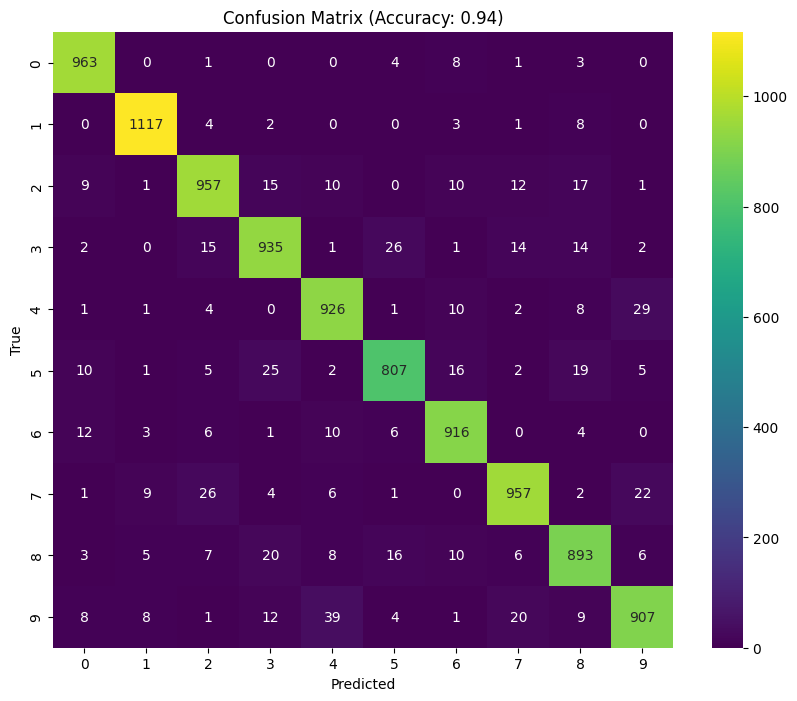

In [20]:
# Random seed
np.random.seed(42)

# Initialize wandb
#wandb.init(project="mnist-neural-network")


X = X_train
Y = y_train
num_classes = 10

x_test = X_test
y_test = y_test

# Initialize parameters
input_dim = 784
hidden1_dim = 196
hidden2_dim = 49
output_dim = num_classes

W1, W2, W3, b1, b2, b3 = initialize_parameters(input_dim, hidden1_dim, hidden2_dim, output_dim)
num_params = W1.size + W2.size + W3.size + b1.size + b2.size + b3.size

# Learning rate & Epochs
lr=5.5e-1
epochs = 100

## Training loop
for epoch in tqdm(range(epochs), desc="Training Progress"):

  ## Random Batches
  # Shuffle the array
  random_indices = np.random.randint(0, len(Y), size=(len(Y)))
  x = X[random_indices]
  y = Y[random_indices]

  ## Training
  # Forward pass
  training_loss, y_hat_tr, a3, a2, a1, z3, z2, z1 = forward_pass(x, y, num_classes, W1, W2, W3, b1, b2, b3)

  # Backwards pass
  W1, W2, W3, b1, b2, b3 = backwards_pass(x, y, num_classes, lr, a3, a2, a1, W1, W2, W3, b1, b2, b3, z1, z2, z3)

  ## Validation
  # Forward pass
  val_loss, y_hat_val, _, _, _, _, _, _ = forward_pass(x_test, y_test, num_classes, W1, W2, W3, b1, b2, b3)

  ## Logging
  train_accuracy = accuracy_score(y, y_hat_tr)
  val_accuracy = accuracy_score(y_test, y_hat_val)

  ## Logging with wandb
  #wandb.log({"train_loss": training_loss, "val_loss": val_loss, "train_accuracy": train_accuracy, "val_accuracy": val_accuracy})

## Logging
#wandb.config.activation_function = "relu"
#wandb.config.batch_size = len(Y)
#wandb.config.epochs = epochs
#wandb.config.input_dims = input_dim
#wandb.config.hidden_layer_1 = hidden1_dim
#wandb.config.hidden_layer_2 = hidden2_dim
#wandb.config.output = output_dim
#wandb.config.learning_rate = lr
#wandb.config.loss_function = "cross_entropy"
#wandb.config.parameters = num_params

#wandb.finish()

# Number of parameters
print(f"Number of parameters: {num_params}")
print()

# Shapes:
print(f"Input shape: {x.shape}")
print(f"Parameters W1 shape: {W1.shape}")
print(f"Parameters b1 shape: {b1.shape}")
print(f"Parameters W2 shape: {W2.shape}")
print(f"Parameters b2 shape: {b2.shape}")
print(f"Parameters W3 shape: {W3.shape}")
print(f"Parameters b3 shape: {b3.shape}")
print(f"Predicted Y shape: {y_hat.shape}")

plot_confusion_matrix(y_test, y_hat_val)

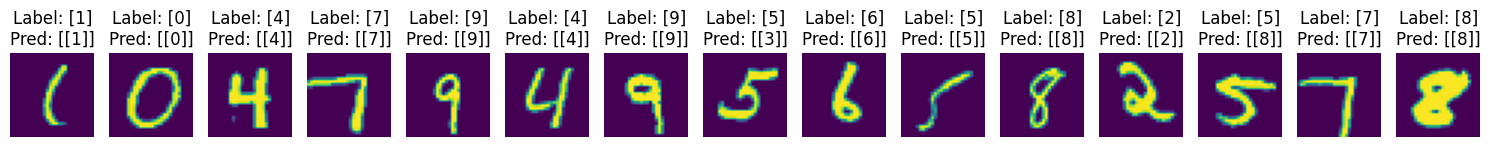

In [ ]:
num_digits = 15

# Create a figure with subplots
fig, axes = plt.subplots(1, num_digits, figsize=(15, 3))

for i in range(num_digits):
    # Randomly select an index
    random_index = np.random.randint(0, len(X_test))
    x_obs = X_test[random_index]  # Select the image at the random index
    y_obs = y_test[random_index]  # Select the corresponding label

    # Forward pass to get the prediction
    _, prediction, _, _, _ = forward_pass(x_obs, y_obs, num_classes, W1, W2, W3, b1, b2, b3)

    # Visualize the digit
    axes[i].imshow(x_obs.reshape(28, 28), cmap='viridis')
    axes[i].set_title(f'Label: {y_obs}\nPred: {prediction}')
    axes[i].axis('off')  # Turn off the axes

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Weights and Biases Report

In [ ]:
from IPython.display import IFrame

# Embed the webpage in an iframe
IFrame(src="https://wandb.ai/gfs3-university-of-illinois-urbana-champaign/mnist-neural-network/reports/MNIST-prediction-with-a-NumPy-Neural-Network---Vmlldzo4OTc1MDA4", width="100%", height="1024px")


## Visualizing Activations...

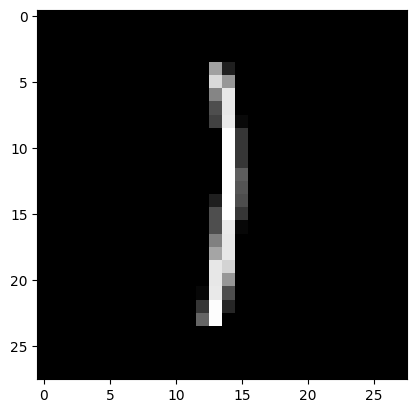

In [ ]:
same_digit = np.where(y_test == 1)[0]
sameX = X_test[same_digit]

i = 7
digit = sameX[i].reshape(28,28)

# plot digit
plt.imshow(digit, cmap='gray')
plt.show()

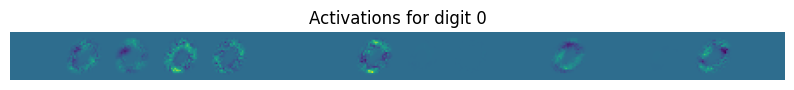

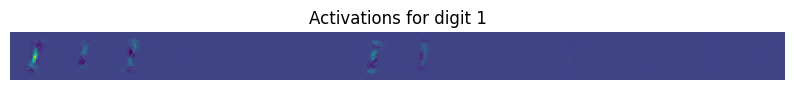

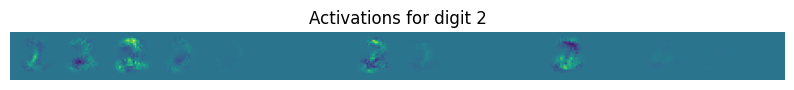

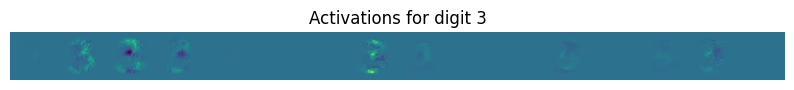

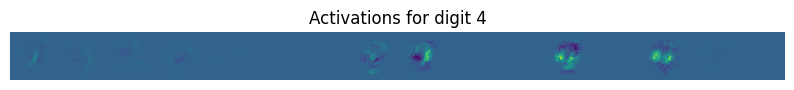

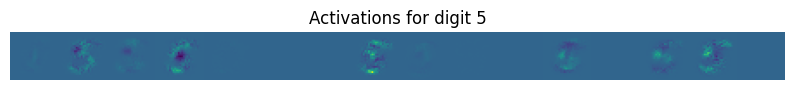

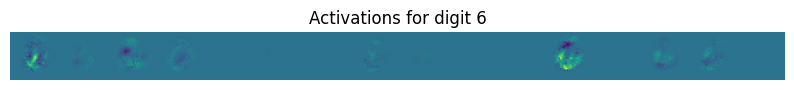

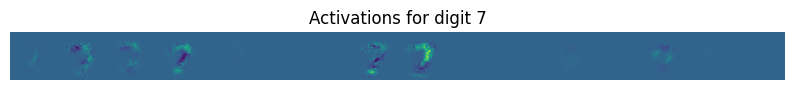

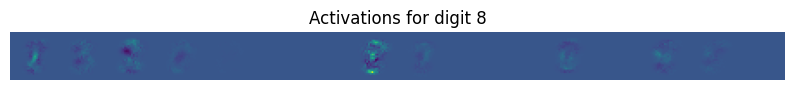

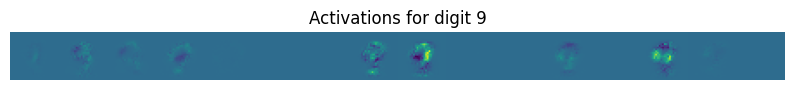

In [ ]:
acts = {digit: [np.zeros((28, 28)) for _ in range(16)] for digit in range(10)}

for digit in range(10):
    same_digit = np.where(y_test == digit)[0]
    sameX = X_test[same_digit]

    for i in range(sameX.shape[0]):
        taco = sameX[i].reshape(-1, 1) * W1 + b1/784

        # Loop through each column in taco
        for j in range(16):
            # Check if the sum of the current column is less than zero
            if taco[:, j].sum() < 0:
                taco[:, j] = 0  # Replace the entire column with 0s if sum < 0

            acts[digit][j] += taco[:, j].reshape(28, 28)

# Now you can concatenate and visualize each digit's activations separately
for digit in range(10):
    act_combined = np.concatenate(acts[digit], axis=1)

    plt.figure(figsize=(10, 2))
    plt.imshow(act_combined, cmap='viridis')
    plt.title(f'Activations for digit {digit}')
    plt.axis('off')
    plt.show()

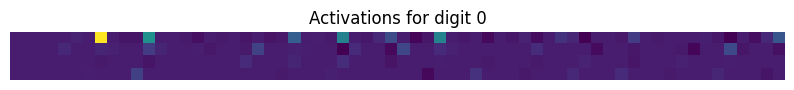

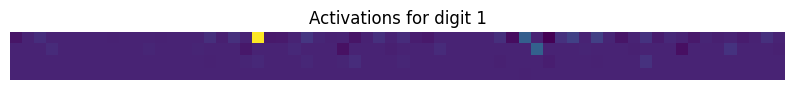

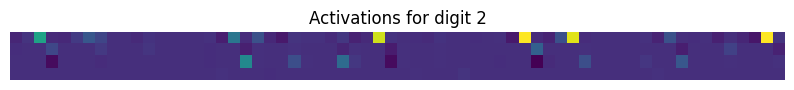

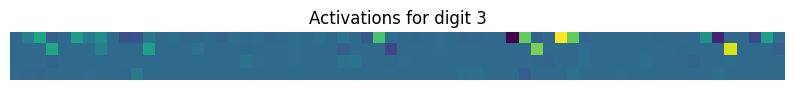

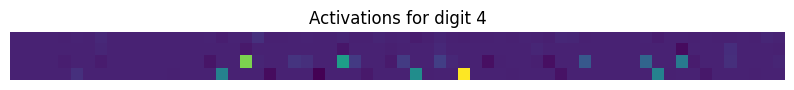

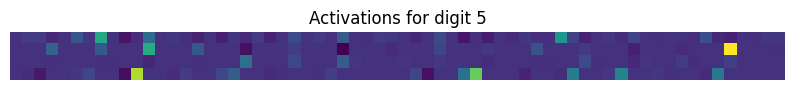

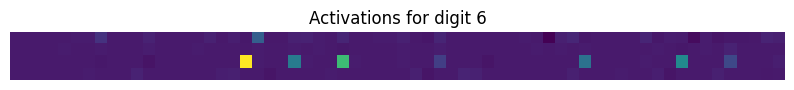

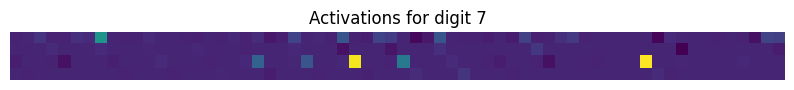

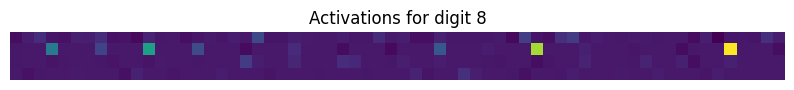

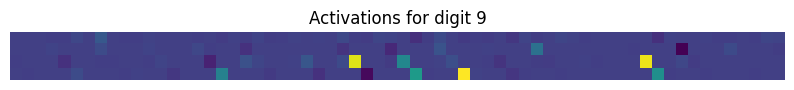

In [ ]:
import matplotlib.pyplot as plt

acts = {digit: [np.zeros((4, 4)) for _ in range(16)] for digit in range(10)}

for digit in range(10):
    same_digit = np.where(y_test == digit)[0]
    sameX = X_test[same_digit]

    for i in range(sameX.shape[0]):
        taco = relu(np.matmul(sameX[i], W1) + b1)
        taco = taco.reshape(-1, 1) * W2 + b2 / 784

        # Loop through each column in taco
        for j in range(16):
            # Check if the sum of the current column is less than zero
            if taco[:, j].sum() < 0:
                taco[:, j] = 0  # Replace the entire column with 0s if sum < 0

            acts[digit][j] += taco[:, j].reshape(4, 4)


# Now you can concatenate and visualize each digit's activations separately
for digit in range(10):
    act_combined = np.concatenate(acts[digit], axis=1)

    plt.figure(figsize=(10, 2))
    plt.imshow(act_combined, cmap='viridis')
    plt.title(f'Activations for digit {digit}')
    plt.axis('off')
    plt.show()

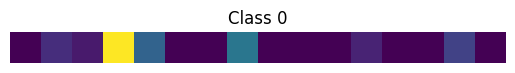

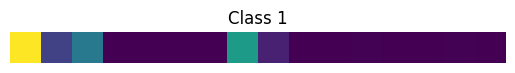

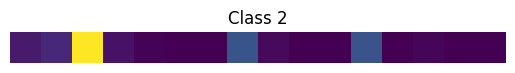

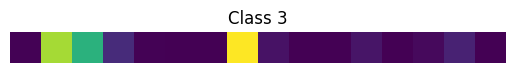

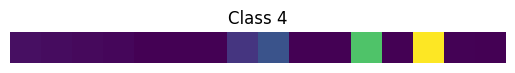

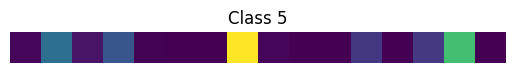

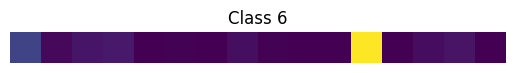

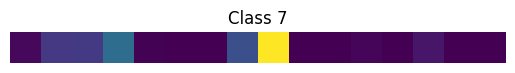

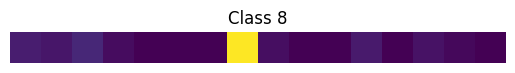

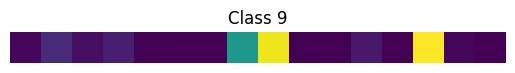

In [ ]:
for i in range(10):
  same_digit = np.where(y_test == i)[0]
  sameX = X_test[same_digit]

  z1 = np.matmul(sameX,W1) + b1
  a1 = relu(z1)
  a1.shape

  activs1 = np.sum(a1, axis=0).reshape(1,-1)

  plt.imshow(activs1)
  plt.title(f"Class {i}")
  plt.axis('off')
  plt.show()

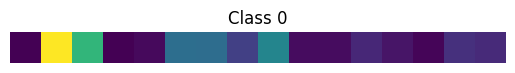

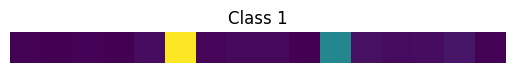

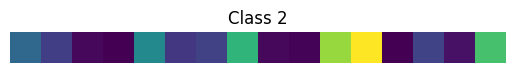

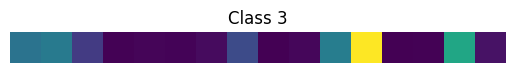

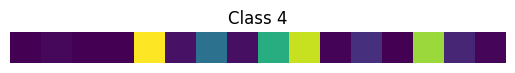

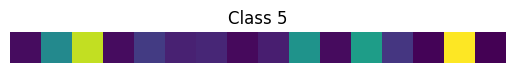

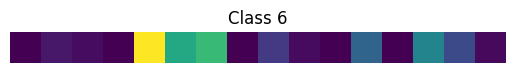

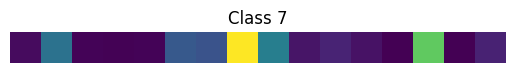

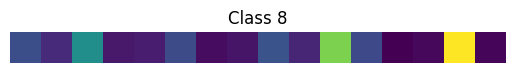

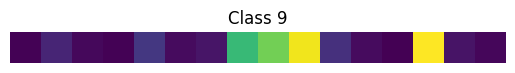

In [ ]:
for i in range(10):
  same_digit = np.where(y_test == i)[0]
  sameX = X_test[same_digit]

  z1 = np.matmul(sameX,W1) + b1
  a1 = relu(z1)

  z2 = np.matmul(a1,W2) + b2
  a2 = relu(z2)

  activs2 = np.sum(a2, axis=0).reshape(1,-1)

  plt.imshow(activs2)
  plt.title(f"Class {i}")
  plt.axis('off')
  plt.show()

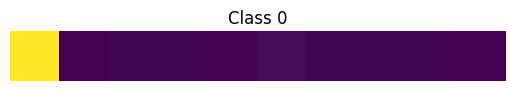

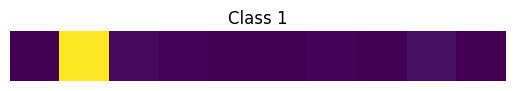

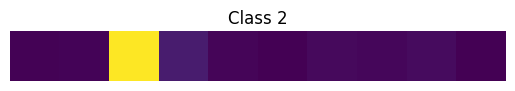

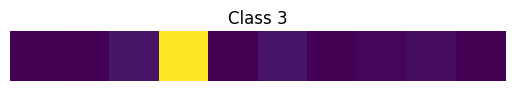

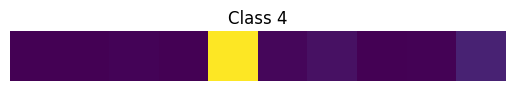

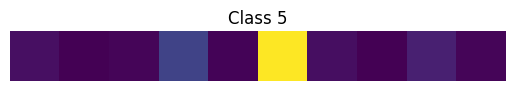

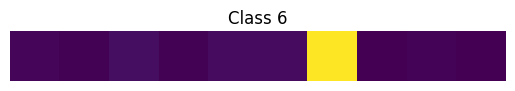

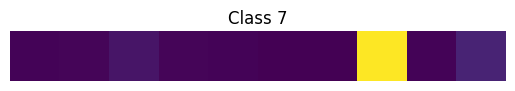

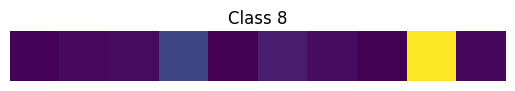

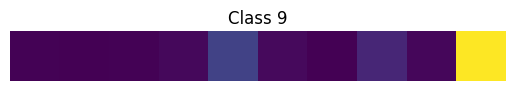

In [ ]:
for i in range(10):
  same_digit = np.where(y_test == i)[0]
  sameX = X_test[same_digit]

  z1 = np.matmul(sameX,W1) + b1
  a1 = relu(z1)

  z2 = np.matmul(a1,W2) + b2
  a2 = relu(z2)

  z3 = np.matmul(a2,W3) + b3
  a3 = softmax(z3)

  activs3 = np.sum(a3, axis=0).reshape(1,-1)

  plt.imshow(activs3)
  plt.title(f"Class {i}")
  plt.axis('off')
  plt.show()